----
# LDA classification using self-made library
With LDA for dimensionality reduction to 5 dimensions

----

In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

In [2]:
# Use noisy data sets
noise = True

# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/soltani_all_{'' if noise else 'no'}noise_1200.csv")
vld_data = pd.read_csv(f"../ValidationData/neodata/soltani_all_{'' if noise else 'no'}noise_1200.csv")
tst_data = pd.read_csv(f"../TestData/neodata/soltani_all_{'' if noise else 'no'}noise_100.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data

y_vld = vld_data.pop('target')
X_vld = vld_data

y_tst = tst_data.pop('target')
X_tst = tst_data

## Standardize data (z-norm)

In [3]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()

X_trn = standardizer.fit_transform(X_trn)
X_vld = standardizer.transform(X_vld)
X_tst = standardizer.transform(X_tst)

## LDA dimensionality reduction

In [4]:
import lda

reducer = lda.reducer(X_trn,y_trn,5)

X_vld = reducer.transform(X_vld)
X_tst = reducer.transform(X_tst)
X_trn = reducer.transform(X_trn)

Preserving 99.69% of variance


---

# LDA fitting

In [5]:
# Training the SVM, on the 5 dimensional data
from sklearn import svm

clf = lda.classifier( X_trn,y_trn )

# Classifying training data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA5-LDA on training set : Accuracy 65.365%'}, xlabel='Predicted class', ylabel='True class'>)

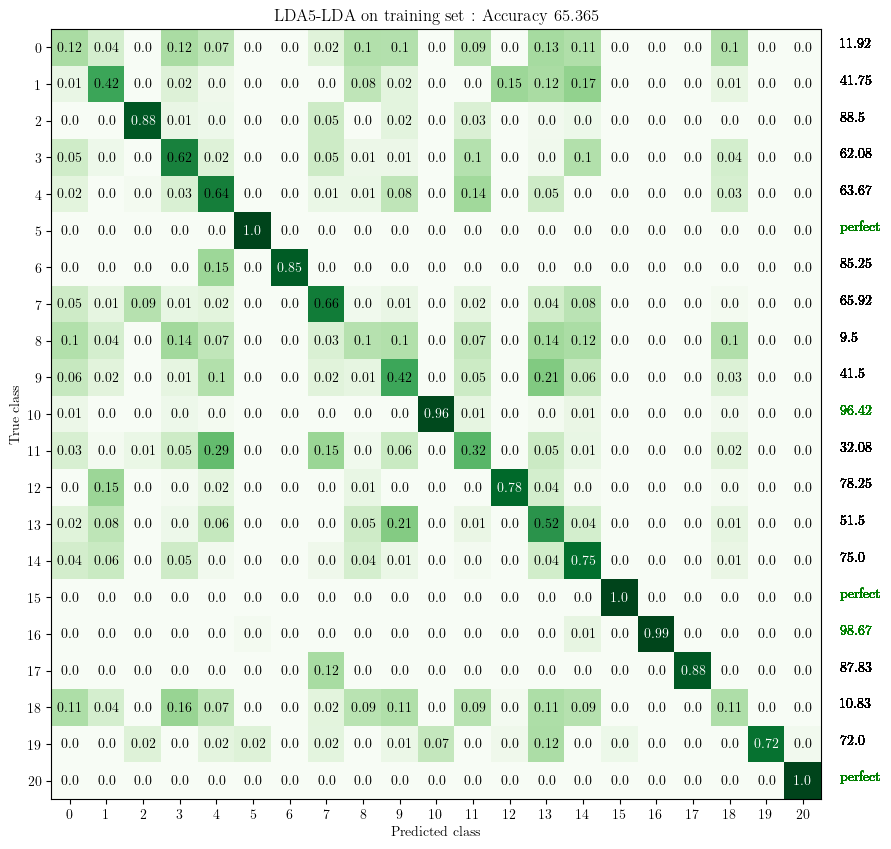

In [6]:
# Make predictions for the training set
y_hat_trn = clf.predict(X_trn)

#plot the confusion matrix
conf_matrix_trn = skconfmatrix(y_trn,y_hat_trn)
confusion_matrix(conf_matrix_trn, figsize = (10,10),title='LDA5-LDA on training set')

# Classifying validation data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA5-LDA on validation set : Accuracy 65.31%'}, xlabel='Predicted class', ylabel='True class'>)

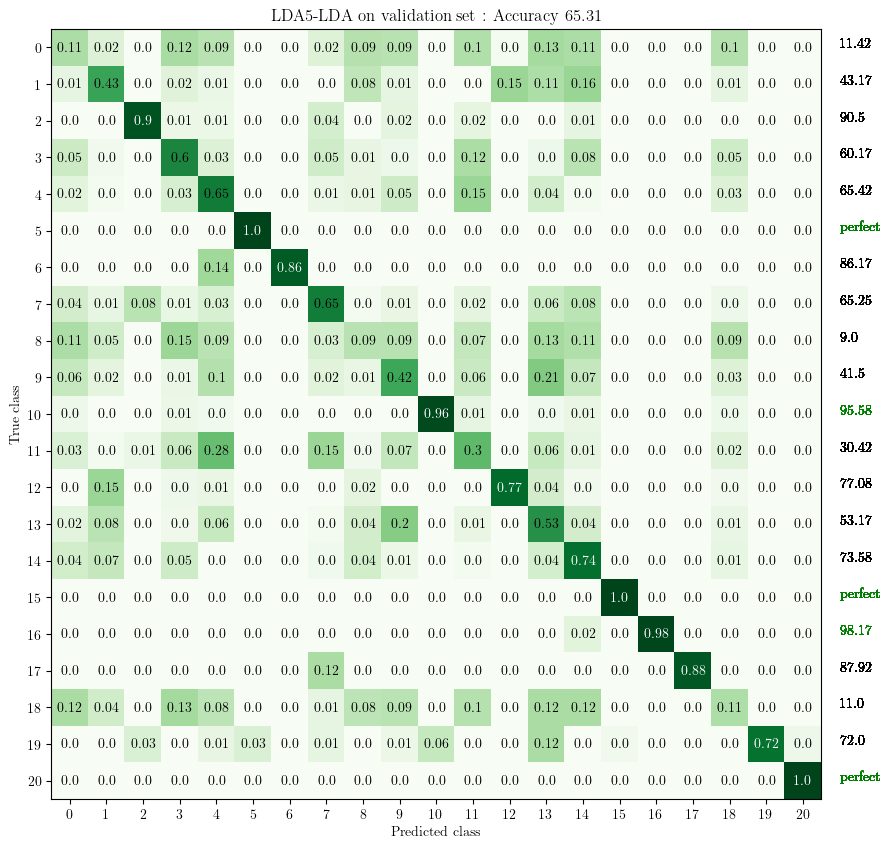

In [7]:
# Make predictions for the training set
y_hat_vld = clf.predict(X_vld)

#plot the confusion matrix
conf_matrix_vld = skconfmatrix(y_vld,y_hat_vld)
confusion_matrix(conf_matrix_vld, figsize = (10,10),title='LDA5-LDA on validation set')

# Classifying test data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA5-LDA on test set : Accuracy 66.81%'}, xlabel='Predicted class', ylabel='True class'>)

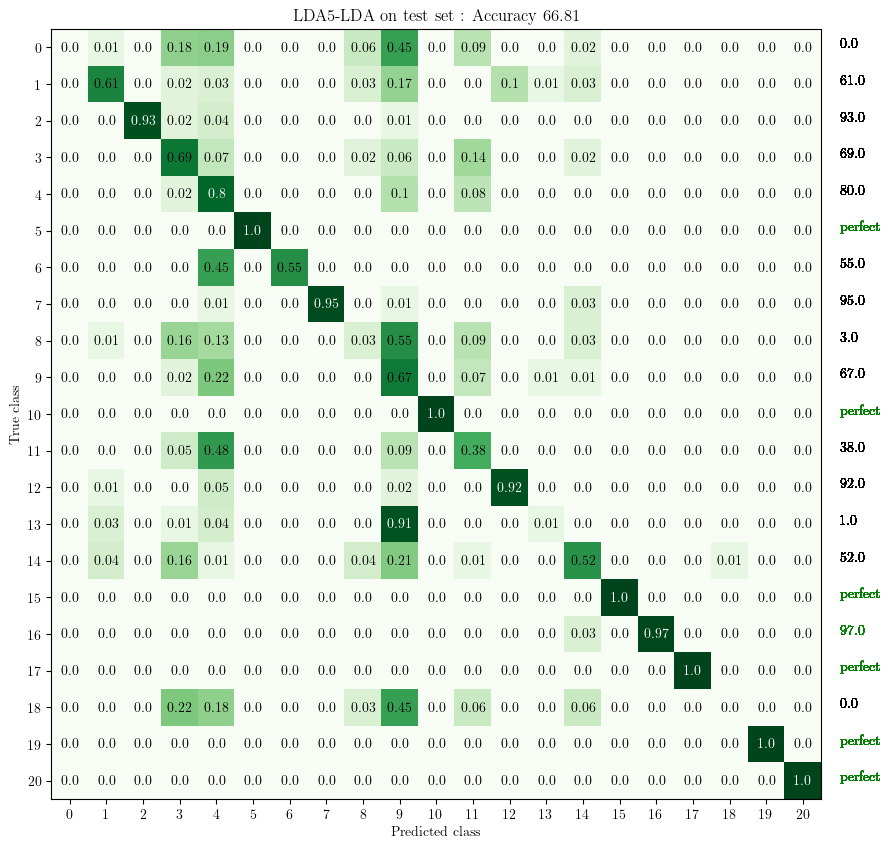

In [8]:
# Make predictions for the training set
y_hat_tst = clf.predict(X_tst)

#plot the confusion matrix
conf_matrix_vld = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix_vld, figsize = (10,10),title='LDA5-LDA on test set')